#WORD2VEC

## Working with Word2Vec with Gensim


We have been working with a number of techniques and tools that help us navigate the world of NLP.       
**For example, we have our Vectorizer:**


In [1]:
%pylab inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = ['That is should come to this!', 'This above all: to thine own self be true.', 'Something is rotten in the state of Denmark.']
vectorizer = CountVectorizer(ngram_range=(1,2))

vectorizer.fit(text)
x = vectorizer.transform(text)
x_back = x.toarray()

pd.DataFrame(x_back, columns=vectorizer.get_feature_names())

Populating the interactive namespace from numpy and matplotlib


,above,above all,all,all to,be,be true,come,come to,denmark,in,...,the,the state,thine,thine own,this,this above,to,to thine,to this,true
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,0


** An Adverse Traits abou the Bag of Words model:**      
    - Word Context & semantic meaning does not play a role   


** And then came Word2Vec** 

We will see that with Word2Vec context does play a role and it can decipher the relationship between words 


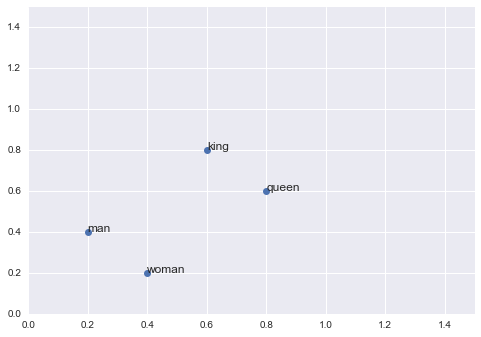

In [2]:
import seaborn as sb  
import numpy as np

words = ['king','queen', 'man', 'woman']  


vectors = np.array([[0.6,   0.8], 
                    [0.8, 0.6],
                   [.2,.4],[.4,.2]]
                 ) 

sb.plt.plot(vectors[:,0], vectors[:,1], 'o')  
sb.plt.xlim(0, 1.5)  
sb.plt.ylim(0, 1.5)  
for word, x, y in zip(words, vectors[:,0], vectors[:,1]):  
    sb.plt.annotate(word, (x, y), size=12)

## First things first :


## First things first :


**1) Install Gensim: **

pip install gensim

**  2)  Make sure cython is installed ? **

cython -V

(if no cython):

pip install cython


** 3) test (Run the sample code in following cell) **


In [4]:
import gensim
documents = ["Will this work?  I'm not sure.  If not go to step #4 (above)"]
texts = [[word for word in document.lower().split()]
         for document in documents]

print texts
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=4,sg=1)

[['will', 'this', 'work?', "i'm", 'not', 'sure.', 'if', 'not', 'go', 'to', 'step', '#4', '(above)']]



**4) If you see the following error : "UserWarning: C extension not loaded for Word2Vec"**


Do the following:

1.  pip uninstall gensim
2.  pip uninstall scipy 

3. pip install --no-cache-dir scipy==0.15.1
4. pip install --no-cache-dir gensim==0.12.1


**Refer to the following:** https://groups.google.com/forum/#!topic/gensim/isBqIhrw9mk

In [5]:
#  A 'Gensim' example: 

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

##  Word2Vec (In a Word..)

###  1: Preprocessing

1) Tokenization   
2) Remove stop words    
3) Convert to lowercase     
4) Others: stemming.. 

In [6]:
# The type of input that Word2Vec is looking for.. 
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

print texts

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]


###  2: Word Representation

Learn a continuous representation of words.
Each word (w) is associated with it's own word vector C(w)

In [46]:
import gensim
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2,sg=1)

#print model.vocab
print model.vocab['minors']

Vocab(count:2, index:4, sample_int:804211817)


In [11]:
#  and Voila !    We have our word vector 
print model['computer']

[ 0.00358155  0.00264495 -0.00401788  0.00149795 -0.00194208  0.00045494
 -0.00017517  0.0013563  -0.00399634  0.00104367 -0.00279939  0.00215701
 -0.0022176  -0.00280289 -0.00152524  0.00427915  0.00151263 -0.00368231
 -0.00362804  0.0014829   0.00033702  0.0014282  -0.00318798 -0.00481104
  0.00064264  0.0041865  -0.00427888  0.00062682 -0.00080342 -0.00499865
 -0.00364611  0.00132216 -0.00449747 -0.00371323 -0.00272111  0.00494667
 -0.00280392  0.00320229  0.00346256 -0.00225677 -0.001115   -0.00231972
  0.00036926 -0.00090166 -0.00046707 -0.00385928 -0.00196428 -0.00238861
 -0.00350803 -0.00146319  0.00112949  0.00418342  0.00376145  0.00302149
  0.00321145  0.00430367  0.00351456  0.00297585  0.00080843 -0.00160295
 -0.00343848  0.00124714  0.00095836  0.00302949 -0.00010518 -0.0009199
 -0.00101466 -0.00157668  0.00212804  0.00119765  0.00340973  0.00465541
  0.00158798 -0.00401529  0.00153894 -0.00358201  0.00212459  0.00414292
 -0.00073451 -0.0025579   0.00218826 -0.0028648  -0.

###  What do we have?   Word Embeddings 

**A word embedding W : words → ℝn **

The output above is the result of 'word' projections in a latent space
of N dimensions, (N ~ size of NN layer we chose).     
Our float values above represent the coordinates for the word 'computer' in our 100-dimensional space!

Our high dimensional vectors stand in place for words.    
Note, that these dimensions are encoding 'latent' properties for 'computer' (such that 'queen' will be geometrically closer to 'king' than it would to be to (let's say) 'computer'. 


Word Embeddings are useful because:

1.  We can measure the semantic similarity between two words
2.  We can use these word vectors as features for various NLP supervised learning tasks (such as classifcation, sentiment analysis). 

We will see how we get here.. 


### 3  Skip-Gram Methods &  CBOW Methods : 

#### Skip-Gram: 

**example sentence:**  

**  "We are on the cusp of deep learning for the masses"

Example Context window: "deep learning for the masses"  (Context Window = 3 & Skip-Gram = 1)

Input of skip-gram is a single word (Wi) 'learning', we will determine the probability of seeing the words (Wo) : 'deep', 'for','masses'

Step 1) Transform our vobabulary into a 'bag of indices'

Step 2) One-hot encode (input/ output vectors) 

Step 3) Randomly initialize our Weight Vectors

(W is what we are after by the way!) 

Step 4) Calculate Softmax probabilities
What is the probability of 'seeing' the word 'deep' given that we've seen the word 'learning'?  -- >  Using SGD together with softmax regression, we will maximize the probability of seeing 'deep' and 'learning' together. 

P(Wo|Wi) = (exp(Wi.Wo)/ sum(exp(Wi.Woj)   (sum~ sum of all Woj for all j in Vocabulary)

Step 5) Gradient Descent (Update Matrix values (Corrections made in the direction of Gradient))

Wo = Wo - a*ej*Wi
    
(ej~ error = 1 - p_deep) 

Step 6) Now update our W matrix: 
Wi=Wi-a*ej*Wo

Step 7) Repeat..

 
<img src='skip_gram.png'/>


### CBOW: 


CBOW: very similiar model with the inputs & outputs reversed.  The input layer consists of our word window (Size C)

<img src='CBOW.png'/>



In [24]:
# Build corpus from 
import os
import nltk
from nltk.corpus import stopwords

# we may need to download gutenberg
#nltk.download()

stop = stopwords.words('english')
stop+=['?','!','.',',',':',';']


class MySentences2(object):
     def __init__(self, dirname):
            self.dirname = dirname
 
     def __iter__(self):
         for fname in os.listdir(self.dirname):
                for line in open(os.path.join(self.dirname, fname)):
                    word=line.lower().split()
                    if word not in stop:
                        yield word
                    
sentences = MySentences2('/Users/username/nltk_data/corpora/gutenberg') 
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)

In [31]:
model.most_similar('king' ,topn=4)

[('moses', 0.8525396585464478),
 ('david', 0.8345323204994202),
 ('jesus', 0.8198438882827759),
 ('son', 0.7985716462135315)]

In [27]:
# Similarity

model.similarity('woman','man')

0.78856501844242932

In [28]:
# Compute cosine_similarity

model.n_similarity(['woman', 'girl'], ['man', 'boy'])

0.82794807792722214

In [35]:
model.doesnt_match("breakfast soldier cowboy warrior".split())

'breakfast'

Other very cool methods!:      


Doc2Vec extends the word2vec algorithm to larger blocks of texts (paragraphs, documents, articles):    
https://radimrehurek.com/gensim/models/doc2vec.html

http://learningaboutdata.blogspot.com/2014/06/plotting-word-embedding-using-tsne-with.html

https://districtdatalabs.silvrback.com/modern-methods-for-sentiment-analysis

https://radimrehurek.com/gensim/models/word2vec.html

### But if you really want to refine your model, you'll need more data:


https://code.google.com/p/word2vec/

Download:  'freebase-vectors-skipgram1000-en.bin.gz'

###   Some things to keep in Mind when using Word2Vec:

Word2vec requires a lot of data to train.

As we've illustrated, you can download pretrained vectors. However, if you would need to train your own data 
you will need a lot of it!  (Think Hundreds of Millions of Words!) 
